<a href="https://colab.research.google.com/github/Olamide643/Auto/blob/main/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# I will be working on the mnist_hand_writing data

In [17]:
# Importing the libraries
from tensorflow import keras
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import pandas as pd
from keras.layers.regularization.spatial_dropout3d import Dropout
from keras.layers.serialization import activation


In [18]:
# Downloading the data set from keras 
def get_data_preprocess():
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  print(f"The shape of the training set is {x_train.shape}")
  print(f"The shape of the test set is {x_test.shape}")
  print()
  print(f"The shape of the  label is {y_train.shape}")
  print(f"The shape of the test label is {y_test.shape}")

  # Converting the label to a categetorical label
  y_test = np_utils.to_categorical(y_test)
  y_train = np_utils.to_categorical(y_train)

  return x_train/255.0,y_train,x_test/255,y_test


In [19]:
# Visualing the images of the trainig set
def display_images(x_train,y_train,num_of_images= 25, nrows=5, ncols = 5):
    fig, axes = plt.subplots(nrows,ncols, figsize = (1.5*nrows,2*ncols))

    # Display 50 random images from the training_set 
    for x_index in range(0,nrows):
      for y_index in range(0,nrows):
        random_image = randint(0,1000)
        axes[x_index,y_index].imshow(x_train[random_image], cmap ='gray')
        #axes[x_index,y_index].set_title('Label: {}'.format(y_train[random_image]))
    plt.show()

In [20]:
# Define the Convolutional Neural Networks Model

def neural_model():
    # Data augmentation

    nn_model = keras.models.Sequential([
        
        # Data Augumentation
        #keras.layers.experimental.preprocessing.RandomFlip(mode = 'horizontal_and_vertical', input_shape= (28,28,1)),
        #keras.layers.experimental.preprocessing.RandomZoom(0.2),
        #keras.layers.experimental.preprocessing.RandomRotation(0.2),

        # Rescaling the data set
        #keras.layers.experimental.preprocessing.Rescaling(1./255),

        # Convolution2D and maxpooling  
        Conv2D(filters = 32, kernel_size = (3,3), activation='relu',input_shape = (28,28,1)),
        MaxPooling2D(pool_size = (2,2)),

        # Convolution2D and maxpooling  
        #Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
        #MaxPooling2D(pool_size = (2,2)),
        #Dropout(0.25),

        # Convolution2D and maxpooling  
        #Conv2D(filters = 128, kernel_size = (3,3), activation='relu'),
        #MaxPooling2D(pool_size = (2,2)),
        #Dropout(0.25),

        #Flatten()

        Flatten(),

        # First Hidden Layer
        Dense(128, activation="relu"),
        Dropout(0.5),

        # Second Hidden Layer 
        Dense(64,activation='relu'),
        Dropout(0.5),


        # Third Hidden Layer 
        Dense(32, activation='relu'),
        

        # Output Layer 
        Dense(10, activation='softmax'),
        
      ])


    # Compiling the model
    opt = Adam(learning_rate=0.01)
    nn_model.compile(loss = "categorical_crossentropy", optimizer=opt, metrics =["accuracy"])

    # print out the summary of the model
    nn_model.summary()

    # Print out the  hierarchical structure of the model
    keras.utils.plot_model(
        nn_model,
        to_file="model.png",
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=True,
        dpi=96,
    )

    return nn_model

In [21]:
# Accuracy and loss Visualization
def accuracy_loss_plot(history):
  dataframe = pd.DataFrame(history.history)
  dataframe.plot()
  plt.grid(True)
  plt.show()


In [22]:
# Fitting the model on the training set
def fit_the_model(model,x_train, y_train,epochs = 10,batch_size=32):
    print(f"The sahpe is  {x_train.shape}")

    # Save the best model
    checkpoint_filepath = '/tmp/checkpoint'
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_format="h5",
      save_weights_only=False,
      monitor='loss',
      mode='min',
      save_best_only=True)
    
    ## Early stopping
    callbacks = [
             #EarlyStopping(patience=2),
             model_checkpoint_callback
             ]
    history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test,y_test), callbacks=callbacks)
    return history

In [23]:
# Download the  dataset
x_train,y_train,x_test,y_test = get_data_preprocess()

The shape of the training set is (60000, 28, 28)
The shape of the test set is (10000, 28, 28)

The shape of the  label is (60000,)
The shape of the test label is (10000,)


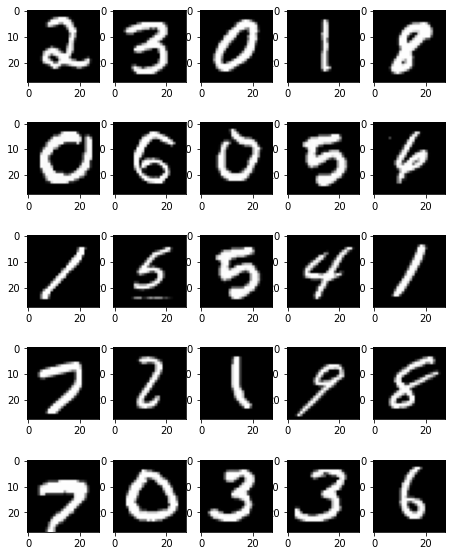

In [24]:
# Display the images of the training set
display_images(x_train,y_train)

In [25]:
# Defin the Model
model = neural_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                      

In [26]:
# Train the model and save the best
history = fit_the_model(model,x_train, y_train,epochs = 50,batch_size=32 )

The sahpe is  (60000, 28, 28)
Epoch 1/50
1871/1875 [============================>.] - ETA: 0s - loss: 0.4747 - accuracy: 0.8627

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4745 - accuracy: 0.8627 - val_loss: 0.1308 - val_accuracy: 0.9644
Epoch 2/50
1869/1875 [============================>.] - ETA: 0s - loss: 0.3020 - accuracy: 0.9219

1875/1875 [==============================] - 9s 5ms/step - loss: 0.3015 - accuracy: 0.9220 - val_loss: 0.1231 - val_accuracy: 0.9703
Epoch 3/50
1864/1875 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.9290

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2815 - accuracy: 0.9290 - val_loss: 0.1272 - val_accuracy: 0.9688
Epoch 4/50
1863/1875 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9372

1875/1875 [==============================] - 9s 5ms/step - loss: 0.2562 - accuracy: 0.9373 - val_loss: 0.1326 - val_accuracy: 0.9676
Epoch 5/50
1870/1875 [============================>.] - ETA: 0s - loss: 0.2505 - accuracy: 0.9391

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2506 - accuracy: 0.9391 - val_loss: 0.1214 - val_accuracy: 0.9733
Epoch 6/50
1875/1875 [==============================] - ETA: 0s - loss: 0.2406 - accuracy: 0.9424

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2406 - accuracy: 0.9424 - val_loss: 0.1241 - val_accuracy: 0.9705
Epoch 7/50
1870/1875 [============================>.] - ETA: 0s - loss: 0.2321 - accuracy: 0.9440

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2331 - accuracy: 0.9440 - val_loss: 0.1099 - val_accuracy: 0.9725
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2339 - accuracy: 0.9442 - val_loss: 0.1157 - val_accuracy: 0.9706
Epoch 9/50
1863/1875 [============================>.] - ETA: 0s - loss: 0.2266 - accuracy: 0.9459

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2268 - accuracy: 0.9458 - val_loss: 0.1191 - val_accuracy: 0.9725
Epoch 10/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.9466

1875/1875 [==============================] - 8s 5ms/step - loss: 0.2255 - accuracy: 0.9466 - val_loss: 0.1356 - val_accuracy: 0.9715
Epoch 11/50
1863/1875 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9484

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2123 - accuracy: 0.9484 - val_loss: 0.1166 - val_accuracy: 0.9729
Epoch 12/50
1863/1875 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9509

1875/1875 [==============================] - 9s 5ms/step - loss: 0.2010 - accuracy: 0.9509 - val_loss: 0.1309 - val_accuracy: 0.9717
Epoch 13/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2166 - accuracy: 0.9487 - val_loss: 0.1256 - val_accuracy: 0.9735
Epoch 14/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2060 - accuracy: 0.9508 - val_loss: 0.1342 - val_accuracy: 0.9746
Epoch 15/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2039 - accuracy: 0.9514 - val_loss: 0.1104 - val_accuracy: 0.9753
Epoch 16/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2047 - accuracy: 0.9498 - val_loss: 0.1270 - val_accuracy: 0.9739
Epoch 17/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2194 - accuracy: 0.9474 - val_loss: 0.1304 - val_accuracy: 0.9719
Epoch 18/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2133 - accuracy: 0.9492 - val_loss: 0.1509 - val_accuracy: 0.97

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2004 - accuracy: 0.9526 - val_loss: 0.1266 - val_accuracy: 0.9734
Epoch 23/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2043 - accuracy: 0.9511 - val_loss: 0.1200 - val_accuracy: 0.9752
Epoch 24/50
1875/1875 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9532

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1973 - accuracy: 0.9532 - val_loss: 0.1189 - val_accuracy: 0.9745
Epoch 25/50
1866/1875 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9528

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1914 - accuracy: 0.9529 - val_loss: 0.1321 - val_accuracy: 0.9727
Epoch 26/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2012 - accuracy: 0.9517 - val_loss: 0.1538 - val_accuracy: 0.9739
Epoch 27/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2047 - accuracy: 0.9509 - val_loss: 0.1445 - val_accuracy: 0.9748
Epoch 28/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2074 - accuracy: 0.9518 - val_loss: 0.1635 - val_accuracy: 0.9696
Epoch 29/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1992 - accuracy: 0.9520 - val_loss: 0.1227 - val_accuracy: 0.9755
Epoch 30/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2120 - accuracy: 0.9495 - val_loss: 0.1362 - val_accuracy: 0.9738
Epoch 31/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2042 - accuracy: 0.9505 - val_loss: 0.1588 - val_accuracy: 0.97

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1908 - accuracy: 0.9514 - val_loss: 0.1419 - val_accuracy: 0.9750
Epoch 45/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1918 - accuracy: 0.9516 - val_loss: 0.2655 - val_accuracy: 0.9384
Epoch 46/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2140 - accuracy: 0.9462 - val_loss: 0.1650 - val_accuracy: 0.9706
Epoch 47/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2030 - accuracy: 0.9472 - val_loss: 0.1393 - val_accuracy: 0.9721
Epoch 48/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2023 - accuracy: 0.9488 - val_loss: 0.1493 - val_accuracy: 0.9702
Epoch 49/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2003 - accuracy: 0.9460 - val_loss: 0.1433 - val_accuracy: 0.9756
Epoch 50/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2048 - accuracy: 0.9473 - val_loss: 0.1518 - val_accuracy: 0.97

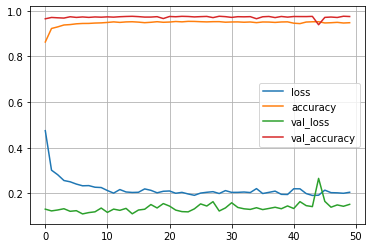

In [28]:
# Plot the history
accuracy_loss_plot(history)

In [29]:
# You can load the save model using the line below
##saved_model = keras.models.load_model(checkpoint_filepath)
